In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/teen-phone-addiction/teen_phone_addiction_dataset.csv


<div style="
    background-color: #800080; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
   📱 The Impact of Smartphone Addiction on Teen Lifestyle and Well-being
</div>


![Imageview](https://static.vecteezy.com/system/resources/previews/005/246/645/non_2x/smartphone-phone-gadget-addiction-on-social-media-online-internet-illustration-free-vector.jpg)

To analyze the usage patterns of smartphones among teenagers and identify the impact of excessive use leading to Smartphone Addiction.

<div style="
    background-color: #800080; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
   📥 Importing Data and Exploring Column Information
</div>


In [2]:
df = pd.read_csv(r"/kaggle/input/teen-phone-addiction/teen_phone_addiction_dataset.csv")
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

<div style="
    background-color: #800080; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
   🗑️ Dropping Unnecessary Columns and ✏️ Renaming Columns
</div>


In [4]:
df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level'],
      dtype='object')

In [5]:
df.drop(["ID","Name","Location", "School_Grade","Social_Interactions","Apps_Used_Daily","Weekend_Usage_Hours",
         "Time_on_Social_Media","Time_on_Gaming","Anxiety_Level","Phone_Checks_Per_Day","Time_on_Education",
         "Screen_Time_Before_Bed"], axis=1, inplace=True, errors='ignore')

In [6]:
# Rename column
df.rename(columns= {
    "Daily_Usage_Hours":"Daily_Phone_Usage(Hours)",
    "Sleep_Hours":"Sleep_Duration(Hours)",
    "Addiction_Level":"Phone_Addiction_Level"},inplace = True)

In [7]:
df.head()

,Age,Gender,Daily_Phone_Usage(Hours),Sleep_Duration(Hours),Academic_Performance,Exercise_Hours,Depression_Level,Self_Esteem,Parental_Control,Phone_Usage_Purpose,Family_Communication,Phone_Addiction_Level
0,13,Female,4.0,6.1,78,0.1,3,8,0,Browsing,4,10.0
1,17,Female,5.5,6.5,70,0.0,7,3,0,Browsing,2,10.0
2,13,Other,5.8,5.5,93,0.8,3,10,0,Education,6,9.2
3,18,Female,3.1,3.9,78,1.6,10,3,0,Social Media,8,9.8
4,14,Other,2.5,6.7,56,1.1,5,1,0,Gaming,10,8.6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3000 non-null   int64  
 1   Gender                    3000 non-null   object 
 2   Daily_Phone_Usage(Hours)  3000 non-null   float64
 3   Sleep_Duration(Hours)     3000 non-null   float64
 4   Academic_Performance      3000 non-null   int64  
 5   Exercise_Hours            3000 non-null   float64
 6   Depression_Level          3000 non-null   int64  
 7   Self_Esteem               3000 non-null   int64  
 8   Parental_Control          3000 non-null   int64  
 9   Phone_Usage_Purpose       3000 non-null   object 
 10  Family_Communication      3000 non-null   int64  
 11  Phone_Addiction_Level     3000 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 281.4+ KB


In [9]:
df.isna().sum()

Age                         0
Gender                      0
Daily_Phone_Usage(Hours)    0
Sleep_Duration(Hours)       0
Academic_Performance        0
Exercise_Hours              0
Depression_Level            0
Self_Esteem                 0
Parental_Control            0
Phone_Usage_Purpose         0
Family_Communication        0
Phone_Addiction_Level       0
dtype: int64

In [10]:
df.shape

(3000, 12)

<div style="
    background-color: #800080; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
   🔄 Changing Data Types
</div>


In [11]:
# Change data type
df[df.select_dtypes("float64").columns] = df.select_dtypes("float64").astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       3000 non-null   int64 
 1   Gender                    3000 non-null   object
 2   Daily_Phone_Usage(Hours)  3000 non-null   int64 
 3   Sleep_Duration(Hours)     3000 non-null   int64 
 4   Academic_Performance      3000 non-null   int64 
 5   Exercise_Hours            3000 non-null   int64 
 6   Depression_Level          3000 non-null   int64 
 7   Self_Esteem               3000 non-null   int64 
 8   Parental_Control          3000 non-null   int64 
 9   Phone_Usage_Purpose       3000 non-null   object
 10  Family_Communication      3000 non-null   int64 
 11  Phone_Addiction_Level     3000 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 281.4+ KB


In [13]:
df.head()

,Age,Gender,Daily_Phone_Usage(Hours),Sleep_Duration(Hours),Academic_Performance,Exercise_Hours,Depression_Level,Self_Esteem,Parental_Control,Phone_Usage_Purpose,Family_Communication,Phone_Addiction_Level
0,13,Female,4,6,78,0,3,8,0,Browsing,4,10
1,17,Female,5,6,70,0,7,3,0,Browsing,2,10
2,13,Other,5,5,93,0,3,10,0,Education,6,9
3,18,Female,3,3,78,1,10,3,0,Social Media,8,9
4,14,Other,2,6,56,1,5,1,0,Gaming,10,8


<div style="
    background-color: #800080; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
  📊 Exploratory Data Analysis (EDA)
</div>


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

📦 Importing Required Libraries  

We will begin by importing the essential Python libraries needed for data analysis and visualization:  

- **pandas** → for handling and analyzing structured data  
- **seaborn** → for statistical data visualization  
- **matplotlib** → for creating customizable plots
This visualization helps us understand whether gender plays a role in phone usage habits among teenagers.

In [15]:
import warnings
warnings.filterwarnings("ignore")

Index(['Age', 'Gender', 'Daily_Phone_Usage(Hours)', 'Sleep_Duration(Hours)',
       'Academic_Performance', 'Exercise_Hours', 'Depression_Level',
       'Self_Esteem', 'Parental_Control', 'Phone_Usage_Purpose',
       'Family_Communication', 'Phone_Addiction_Level'],
      dtype='object')


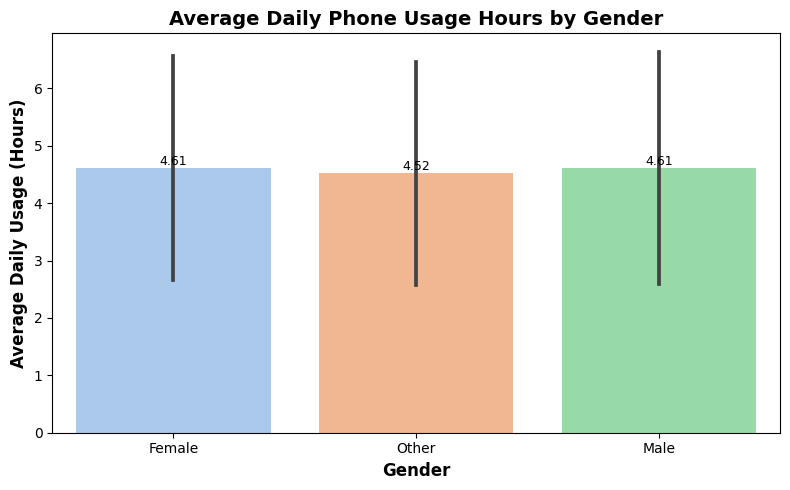

In [16]:
# Check the available column names
print(df.columns)

# Bar plot: Average Daily Phone Usage Hours by Gender
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=df,
    x="Gender",
    y="Daily_Phone_Usage(Hours)",  
    errorbar="sd",                 
    palette="pastel"
)

# Title and labels
plt.title("Average Daily Phone Usage Hours by Gender", fontsize=14, fontweight="bold")
plt.xlabel("Gender", fontsize=12, fontweight="bold")
plt.ylabel("Average Daily Usage (Hours)", fontsize=12, fontweight="bold")

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}",
                (p.get_x() + p.get_width() / 2., height),
                ha="center", va="bottom", fontsize=9, color="black")

plt.tight_layout()
plt.show()


## 📊 Average Daily Phone Usage Hours by Gender

This bar chart shows the **average number of daily phone usage hours** across different genders.  

- **Bars:** Represent the mean daily usage for each gender.  
- **Error bars:** Indicate the **standard deviation (SD)**, showing variability within each group.  
- **Value labels:** Display the exact average usage in hours on top of each bar.  

✅ **Insight:**  
This visualization highlights potential **gender-based differences in phone usage patterns**. If one gender consistently shows higher average usage, it may indicate differing levels of engagement with smartphones or varied lifestyle/behavioral patterns.


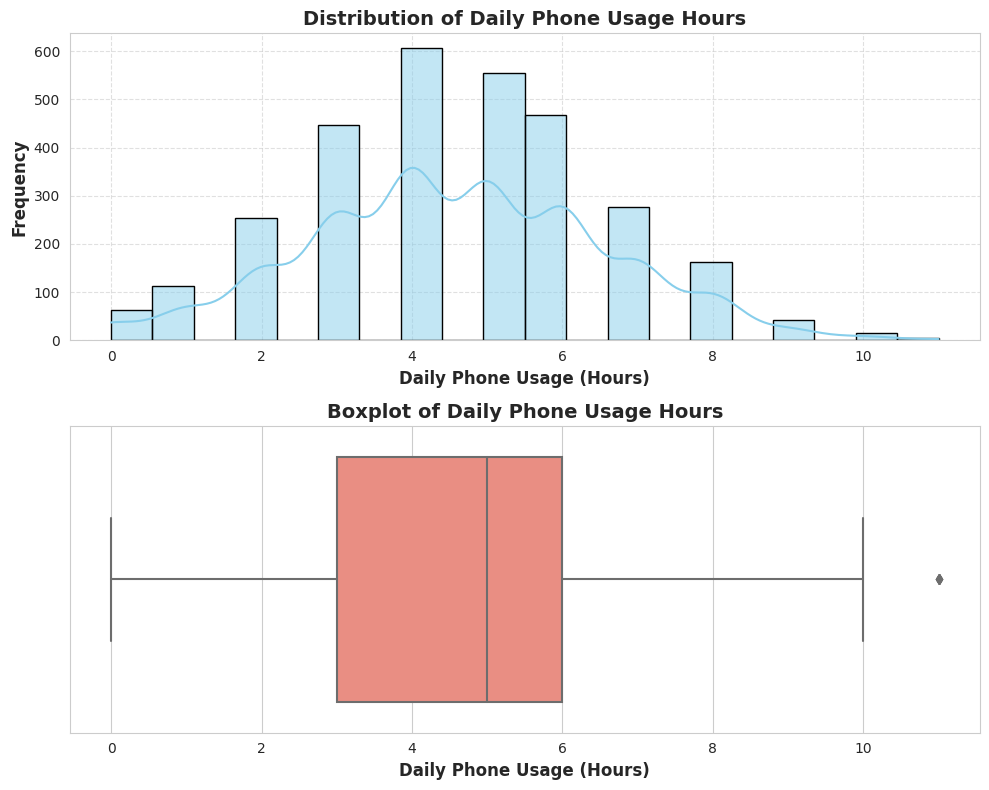

In [17]:
# Set style for consistency
sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))

# --- Histogram with KDE ---
plt.subplot(2, 1, 1) 
sns.histplot(
    data=df,
    x="Daily_Phone_Usage(Hours)",
    kde=True,
    bins=20,
    color="skyblue",
    edgecolor="black"
)
plt.title("Distribution of Daily Phone Usage Hours", fontsize=14, fontweight="bold")
plt.xlabel("Daily Phone Usage (Hours)", fontsize=12, fontweight="bold")
plt.ylabel("Frequency", fontsize=12, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.6)

# --- Boxplot ---
plt.subplot(2, 1, 2)
sns.boxplot(
    data=df,
    x="Daily_Phone_Usage(Hours)",
    color="salmon"
)
plt.title("Boxplot of Daily Phone Usage Hours", fontsize=14, fontweight="bold")
plt.xlabel("Daily Phone Usage (Hours)", fontsize=12, fontweight="bold")
plt.ylabel("")

plt.tight_layout()
plt.show()


## ⏱️ Distribution of Daily Phone Usage Hours

This figure combines a **histogram with KDE** (top) and a **boxplot** (bottom) to analyze daily phone usage patterns.  

- **Histogram + KDE (Top):**  
  - Displays the frequency of daily phone usage (in hours).  
  - The smooth KDE curve highlights the overall distribution trend.  
  - Peaks in the graph indicate the most common usage ranges.  

- **Boxplot (Bottom):**  
  - Provides a summary of the data distribution.  
  - Highlights the **median usage**, **interquartile range (IQR)**, and any **outliers** (extremely high or low usage hours).  

✅ **Insight:**  
Most users fall within a **moderate daily usage range**, but the presence of **outliers** suggests that some individuals spend significantly more time on their phones, which could indicate potential smartphone addiction.


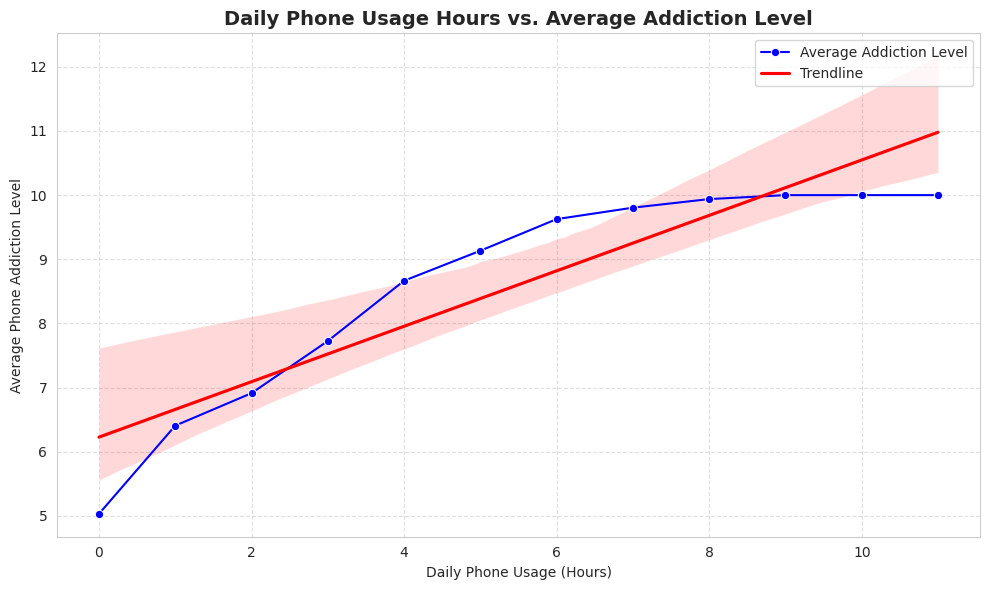

In [18]:
# Group by Daily Usage Hours and calculate mean Addiction Level
grouped_df = df.groupby("Daily_Phone_Usage(Hours)")["Phone_Addiction_Level"].mean().reset_index()

plt.figure(figsize=(10, 6))

# Actual averages (blue line with markers)
sns.lineplot(
    data=grouped_df,
    x="Daily_Phone_Usage(Hours)",
    y="Phone_Addiction_Level",
    marker="o",
    color="blue",
    label="Average Addiction Level"
)

# Regression trendline (red)
sns.regplot(
    data=grouped_df,
    x="Daily_Phone_Usage(Hours)",
    y="Phone_Addiction_Level",
    scatter=False,
    color="red",
    label="Trendline"
)

# Titles and labels
plt.title("Daily Phone Usage Hours vs. Average Addiction Level", fontsize=14, fontweight="bold")
plt.xlabel("Daily Phone Usage (Hours)")
plt.ylabel("Average Phone Addiction Level")

# Grid and legend
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()


## 📊 Daily Phone Usage Hours vs. Average Addiction Level

This line chart illustrates the relationship between **daily phone usage (in hours)** and the corresponding **average addiction level** among users.

- The **blue line with markers** shows the actual average addiction levels for each usage-hour group.  
- The **red regression line** highlights the overall trend, making it easier to observe patterns.  
- The **x-axis** represents daily phone usage hours, while the **y-axis** represents the average phone addiction level.  

✅ **Insight:**  
As the number of **daily phone usage hours increases**, the **average addiction level also tends to rise**. This indicates a **positive correlation** between prolonged smartphone usage and addiction, suggesting that higher screen time may significantly impact teen well-being.


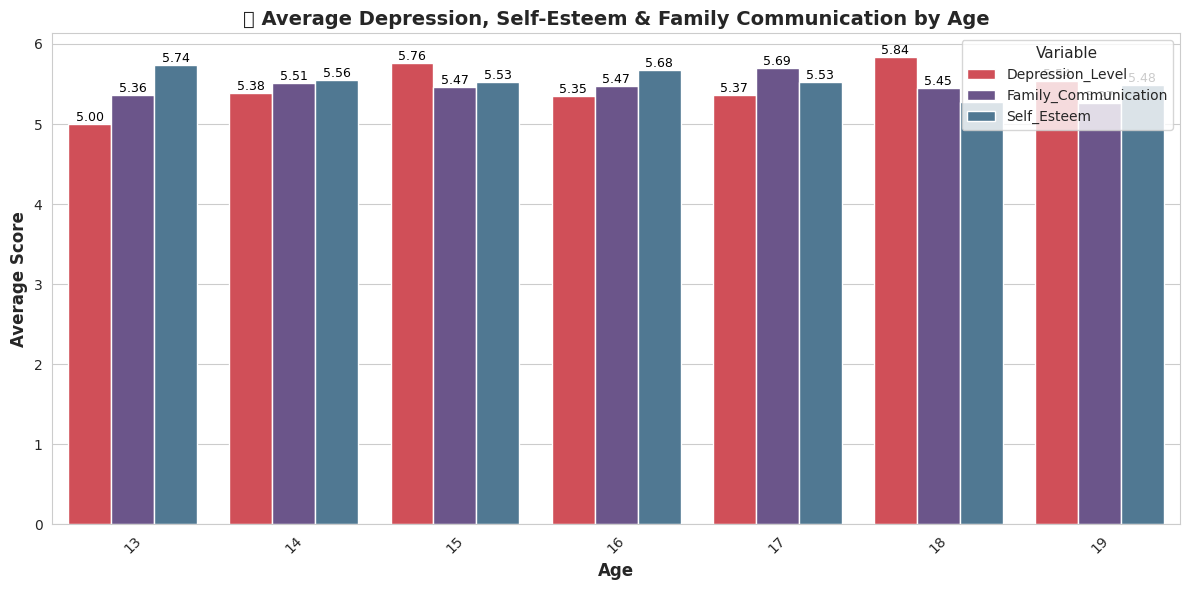

In [19]:
# 🎨 Custom colors (colorblind-friendly)
palette_map = {
    "Depression_Level": "#E63946",      # 🔴 soft red
    "Self_Esteem": "#457B9D",           # 🔵 calm blue
    "Family_Communication": "#6A4C93"   # 🟣 deep violet
}

# Assuming df has Age, Depression_Level, Self_Esteem, Family_Communication
melted_df = df.melt(
    id_vars="Age",
    value_vars=["Depression_Level", "Self_Esteem", "Family_Communication"],
    var_name="Variable",
    value_name="Average_Score"
)

# Ensure Age is numeric and sorted
melted_df["Age"] = melted_df["Age"].astype(int)
melted_df = melted_df.sort_values("Age")

# 📊 Grouped bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=melted_df,
    x="Age",
    y="Average_Score",
    hue="Variable",
    palette=palette_map,
    ci=None  # remove error bars if not needed
)

# 🔢 Add value labels above bars
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height) and height > 0:
        ax.annotate(f"{height:.2f}",
                    (p.get_x() + p.get_width() / 2., height),
                    ha="center", va="bottom",
                    fontsize=9, color="black")

# 📝 Titles and labels
plt.title("📊 Average Depression, Self-Esteem & Family Communication by Age", 
          fontsize=14, fontweight="bold")
plt.xlabel("Age", fontsize=12, fontweight="bold")
plt.ylabel("Average Score", fontsize=12, fontweight="bold")

# 🎯 Legend & formatting
plt.legend(title="Variable", fontsize=10, title_fontsize=11)
plt.xticks(rotation=45)  # rotate if many ages
plt.tight_layout()
plt.show()


🔍 Insights  

- **Depression Levels** 📈 – Show a tendency to **increase with age**, especially in late teens.  
- **Self-Esteem** 🔵 – Fluctuates slightly but tends to **decrease in higher age groups**, indicating possible academic or social stress.  
- **Family Communication** 🟣 – Gradually **declines with age**, which may suggest that teenagers communicate less with parents as they grow older.  

✅ Overall, the visualization highlights how **mental health factors and family support systems evolve with age**, which can directly influence phone addiction and well-being.  

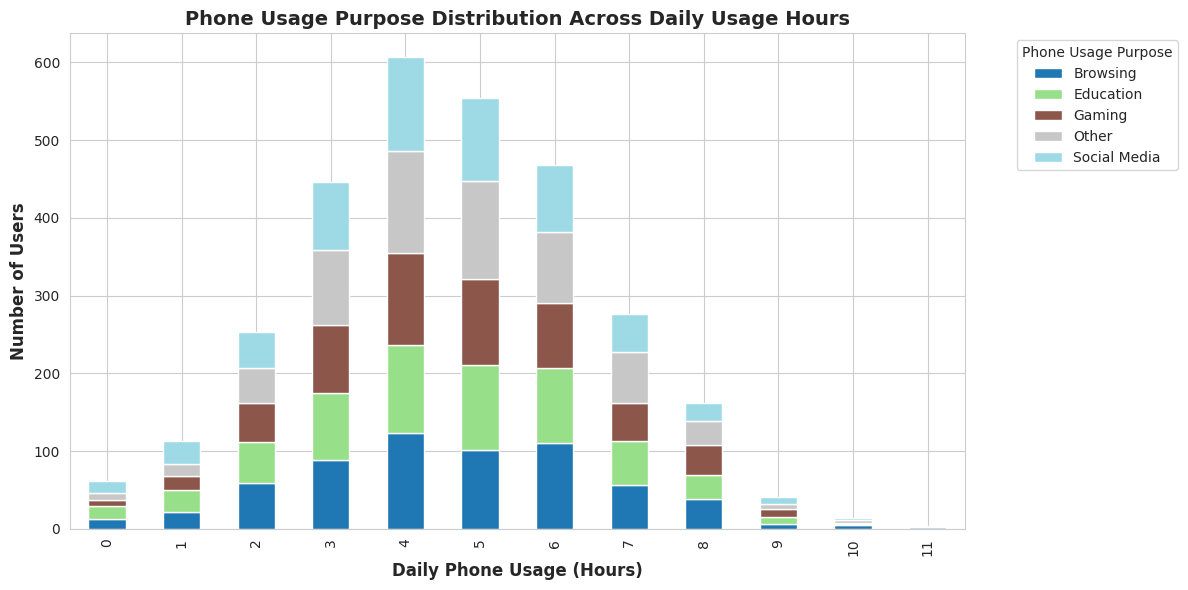

In [20]:
# Group by Daily Usage Hours and Purpose
grouped_df = df.groupby(['Daily_Phone_Usage(Hours)', 'Phone_Usage_Purpose']).size().reset_index(name='Count')

# Pivot the data for stacked bar chart
pivot_df = grouped_df.pivot(index="Daily_Phone_Usage(Hours)", columns="Phone_Usage_Purpose", values="Count").fillna(0)

# Plot stacked bar chart
pivot_df.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab20")

# Titles and labels
plt.title("Phone Usage Purpose Distribution Across Daily Usage Hours", fontsize=14, fontweight="bold")
plt.xlabel("Daily Phone Usage (Hours)", fontsize=12, fontweight="bold")
plt.ylabel("Number of Users", fontsize=12, fontweight="bold")

# Legend
plt.legend(title="Phone Usage Purpose", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


## 📱 Phone Usage Purpose Distribution Across Daily Usage Hours

This stacked bar chart shows how **different purposes of smartphone usage** (such as social media, gaming, education, etc.) vary with the **number of daily phone usage hours**.  

- The **x-axis** represents the average **daily phone usage (in hours)**.  
- The **y-axis** represents the **number of users**.  
- Each color segment in the bar corresponds to a different **phone usage purpose**.  
- The chart is stacked to highlight how purposes contribute to total usage for each usage-hour category.  

✅ **Insight:**  
This visualization helps to identify whether **higher phone usage hours** are dominated by **entertainment/social media** or **productive uses** like education. It can reveal patterns such as whether **addiction is linked more to social or recreational usage**.


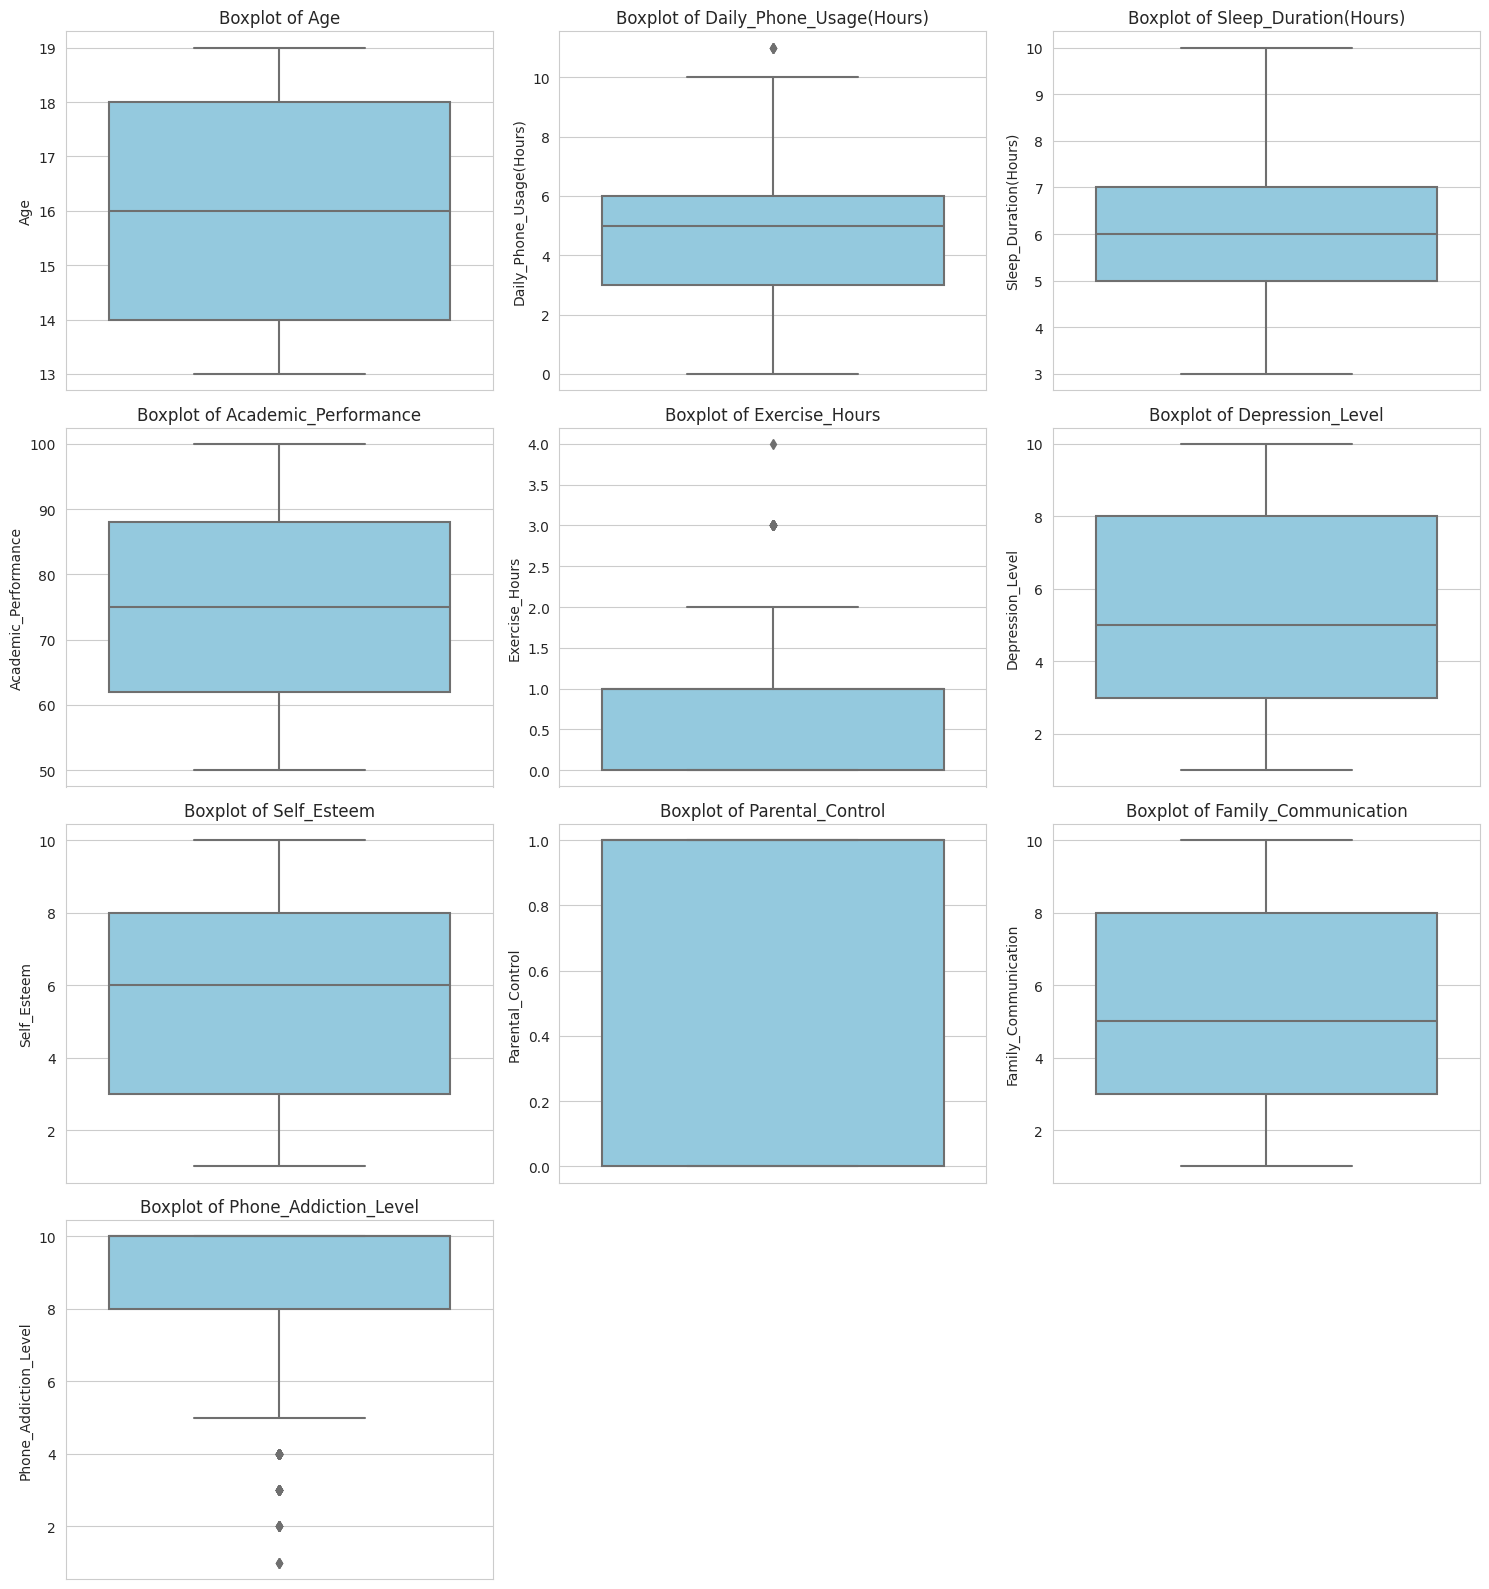

In [21]:
# Identify numerical columns
numeric_cols = df.select_dtypes(include="number").columns

# Create separate boxplots in a grid
num_cols = len(numeric_cols)
cols = 3  # number of plots per row
rows = (num_cols // cols) + (num_cols % cols > 0)

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.show()


📦 Boxplots of Numerical Features  

To better understand the distribution and detect potential **outliers**, boxplots were generated for all numerical columns in the dataset.  

- Each subplot represents a **numerical variable** (e.g., phone usage hours, sleep duration, addiction level, academic performance).  
- The **box** indicates the interquartile range (IQR), the **line inside** shows the median, and **whiskers/outliers** highlight extreme values.  
- This helps identify unusual patterns, such as students with **very high phone usage**, **low sleep duration**, or extreme values in **depression/self-esteem scores**.  

📊 These boxplots provide quick insights into the **spread, central tendency, and outliers** in the dataset, which are crucial for data cleaning and further analysis.  

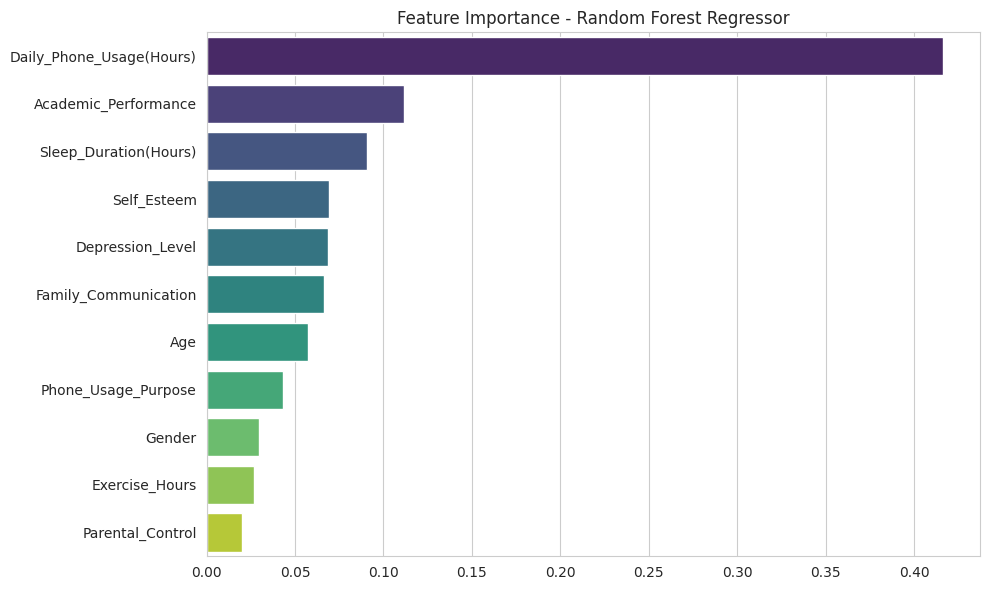

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt, seaborn as sns, pandas as pd

# Clean & encode
df_encoded = df.dropna().copy()
for col in df_encoded.select_dtypes(include="object"):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Features & target
X = df_encoded.drop(columns=["Phone_Addiction_Level"])
y = df_encoded["Phone_Addiction_Level"]

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Feature importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
plt.title("Feature Importance - Random Forest Regressor")
plt.tight_layout()
plt.show()


🌲 Feature Importance using Random Regressor  

    To identify the most influential factors contributing to phone addiction levels, a Random Regressor was applied after preprocessing the dataset.  

#### 📊 Visualization:
- A bar plot was generated to show the **importance score of each feature**.  
- Features with higher importance have a stronger influence on **predicting phone addiction**.  
- This helps us **prioritize factors** (e.g., daily phone usage, sleep hours, academic performance, exercise, etc.) that significantly impact addiction levels.  

✅ **Insight**: Such analysis highlights which behavioral or lifestyle factors should be targeted for effective interventions in reducing phone addiction.  
    Higher importance scores indicate stronger influence on the model’s predictions. This visualization helps in feature selection and understanding model behavior. Useful for reporting and documentation of project results

<div style="
    background-color: #800080; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
  📌 Final Insights & Recommendations
</div>


🔍 Key Insights
1. **Daily Phone Usage strongly influences addiction levels**  
   - Students with higher daily phone usage hours show significantly higher phone addiction scores.  
   - Excessive use also correlates with **lower sleep duration** and **weaker family communication**.  

2. **Mental health impact is clear**  
   - Higher **phone usage** is associated with increased **depression** and **anxiety** levels.  
   - **Self-esteem decreases** as phone addiction rises.  

3. **Lifestyle factors are critical predictors**  
   - **Exercise hours, sleep patterns, and academic performance** play a more important role in predicting phone addiction than demographic factors like **gender** and **age**.  

4. **Purpose of phone usage matters**  
   - Students using phones mainly for **social media and gaming** tend to show higher addiction levels.  
   - Those who use phones for **education** have relatively lower addiction scores.  

---

## ✅ Recommendations
1. **Promote Healthy Screen Habits**  
   - Encourage **screen time limits** and digital well-being apps to monitor daily phone usage.  
   - Establish **no-phone-before-bed** rules to improve sleep quality.  

2. **Encourage Physical Activity**  
   - Regular exercise should be promoted as it is negatively correlated with addiction and positively linked to self-esteem.  

3. **Strengthen Family & Social Support**  
   - Parents should **engage in open communication** instead of strict control measures, which may improve mental well-being and reduce dependence on phones.  

4. **Educational Awareness Programs**  
   - Schools and colleges should raise awareness about the **impact of phone overuse** on academics, sleep, and mental health.  
   - Workshops on **time management and mindful technology use** can help students balance learning and leisure.  

5. **Targeted Interventions for At-Risk Groups**  
   - Students with **high phone addiction levels and low academic performance** should be given counseling support.  
   - Focus on **mental health interventions** to address depression and self-esteem issues linked with phone overuse.  


<div style="
    background-color: #800080; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
  🌟 Conclusion
</div>


Phone addiction is **multifactorial**, with lifestyle and behavioral factors being the strongest predictors. While demographic factors like age and gender are less important, **daily phone usage, sleep duration, exercise, and purpose of use** are critical.  
By implementing **healthy digital habits, encouraging physical activity, and strengthening family support**, we can effectively reduce phone addiction and its negative impact on mental health and academic performance.  

<div style="background-color:#800080; padding:25px; border-radius:12px; text-align:center;">
  <h1 style="color:white;">✅ Thank You</h1>
  <p style="color:white; font-size:18px;">
    We appreciate your time reviewing this analysis.<br>
    For any questions or discussions, feel free to connect.
  </p>
</div>

<p style="text-align:center; color:gray; font-size:14px; margin-top:10px;">
  The impact of smartphone addiction on teen lifestyle and well-being | 2025
</p>
